Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

# Importing the Libraries

In [31]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings("ignore")


## Import the Dataset

In [4]:
df = pd.read_csv("D:/winequality-red.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Find the shape of the dataset
## The following dataset has a total of 1599 rows and 12 columns

In [6]:
df.shape

(1599, 12)

### The following dataset has no null values
#### the data type for features is float and int for target variable

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Let's give the stats of the dataset

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Check the skewness of the dataset

In [10]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Check the distribution of the features

## In the following scenerio all the features are numerical and all have outliers to some extent

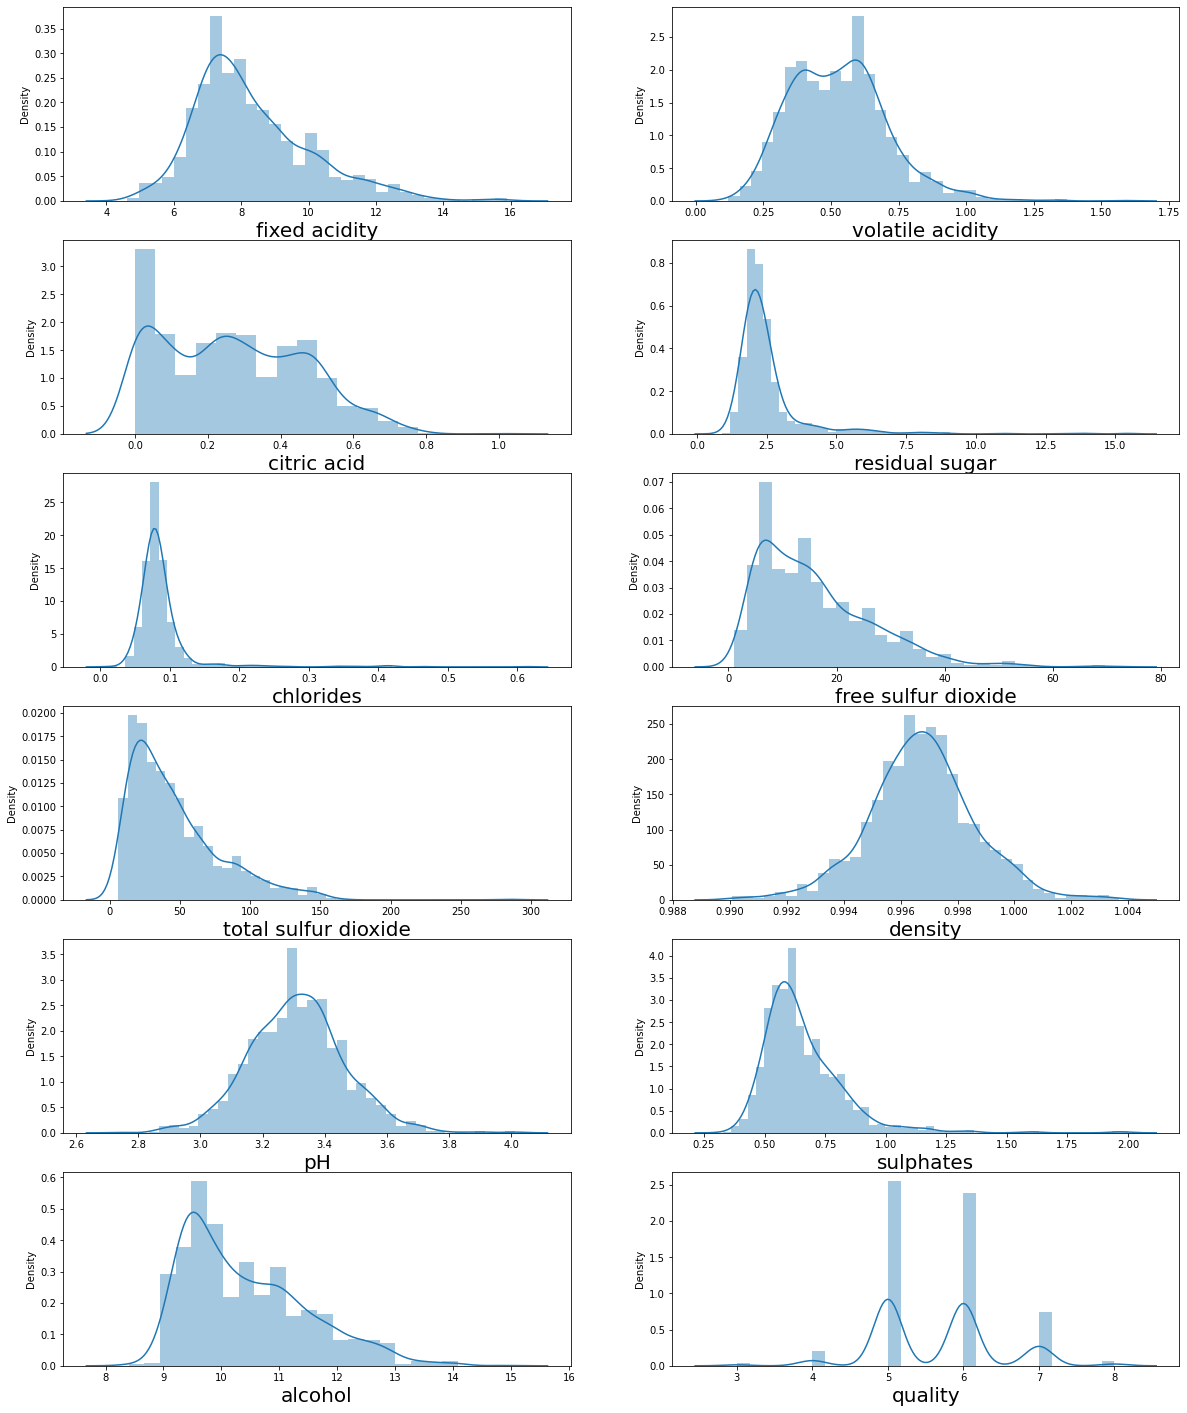

In [11]:
#lets see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax = plt.subplot(6,2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()
    

# Identify column names

### I need the list of columns so that I can apply outlier removal techniques

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Applying zscore to remove outliers or reduce to some extent
## now the stats looks better

In [13]:
#lets remove / try to reduce the skewness: by applying z-score


from scipy.stats import zscore

z_score = zscore(df[['fixed acidity', 'volatile acidity','residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','sulphates', 'alcohol']])
                 
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,8.295041,0.523825,0.264878,2.389674,0.081292,15.163723,43.959918,0.996688,3.318281,0.641637,10.434681,5.650136
std,1.660292,0.169960,0.191050,0.875848,0.021463,9.351347,29.555334,0.001781,0.146916,0.129727,1.036718,0.801435
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995595,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.320000,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,59.000000,0.997800,3.400000,0.712500,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002890,4.010000,1.160000,13.600000,8.000000


# Lets check the loss of percentage of data
### We have about 7.9% data loss and we can go ahead

In [14]:
# Percentage data loss:

loss_percent = (1599-1472)/1599*100
print(loss_percent)

7.9424640400250155


# Lets check the distribution of data post removal of outliers

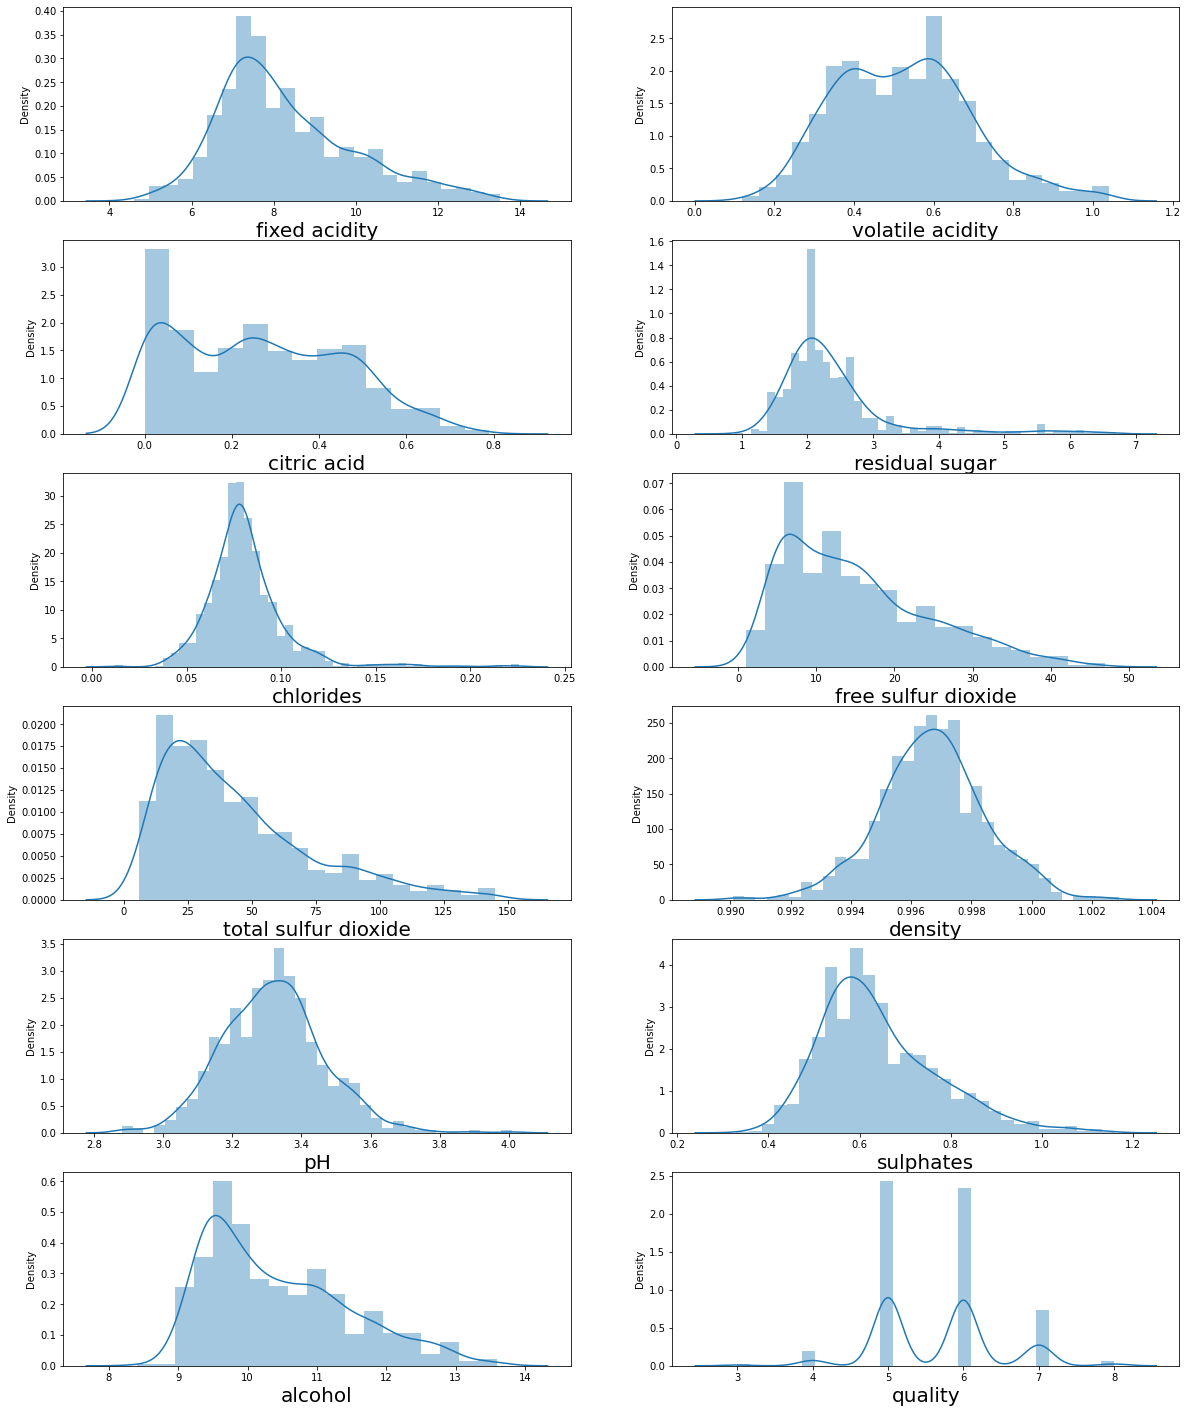

In [15]:
#lets see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax = plt.subplot(6,2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()
    

# Check the correlation of the features with the targte variable

In [16]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=True)

volatile acidity       -0.363484
total sulfur dioxide   -0.214207
density                -0.183641
chlorides              -0.127240
pH                     -0.078552
free sulfur dioxide    -0.054396
residual sugar          0.049424
fixed acidity           0.128310
citric acid             0.236078
sulphates               0.371025
alcohol                 0.492741
quality                 1.000000
Name: quality, dtype: float64

# I am cheking the count of the target variable

## There are 6 unique values but as per the problem statement we need to have 2 class output

<AxesSubplot:xlabel='quality', ylabel='count'>

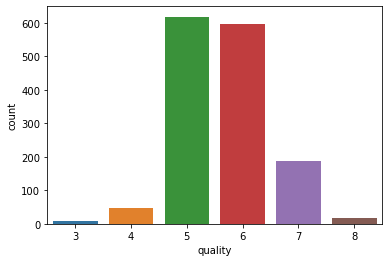

In [17]:
sns.countplot(df["quality"])

# Splitting the dataset between features and target

In [18]:
x = df.drop(columns = ["quality"], axis=1)
y = df["quality"]

### Skewness of feature column post splitting
#### It appears the columns "fixed acidity", "residual sugar" , "chlorides", "free sulfur dioxide", "total sulfur dioxide", "sulphates" and "alcohol" still have skewness to some extent

In [19]:
x.skew()

fixed acidity           0.785702
volatile acidity        0.383844
citric acid             0.291665
residual sugar          2.428922
chlorides               2.172004
free sulfur dioxide     0.861614
total sulfur dioxide    1.163524
density                -0.046699
pH                      0.327555
sulphates               0.887821
alcohol                 0.754957
dtype: float64

# Scaling the dataset

### after scaling we need to transform the x column


In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Variation Inflation factor

### Here its appears the columns "fixed acidity" and "density" are highly correlated with other features.

In [21]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,7.897380,fixed acidity
1,1.879116,volatile acidity
2,3.197934,citric acid
3,1.674239,residual sugar
4,1.200034,chlorides
5,1.945876,free sulfur dioxide
6,2.169067,total sulfur dioxide
7,6.652057,density
8,3.224474,pH
9,1.308991,sulphates


# Dropping the column "density" 
## The correllation is less for "density" column and will be dropping this column

In [22]:
x = x.drop(columns = ["density"])

# The VIF apears to have reduced as shown below

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,3.238925,fixed acidity
1,1.853601,volatile acidity
2,3.197264,citric acid
3,1.148360,residual sugar
4,1.146230,chlorides
5,1.937739,free sulfur dioxide
6,2.154288,total sulfur dioxide
7,2.160121,pH
8,1.236766,sulphates
9,1.365459,alcohol


# Label Binarization

## Since the output should be "good" and "not good", the target variable is being converted as below

### The values greater than 7 would be "good" and less than 7 is "not good"

In [24]:
y = df["quality"].apply(lambda y_val: 1 if y_val >=7 else 0)

### Total unique counts of the target variable

In [25]:
y.value_counts()

0    1268
1     204
Name: quality, dtype: int64

# The class is imbalanced and I will apply SMOTE to balance the dataset

In [26]:
#Handling class imbalance problem ny oversampling the moinority class

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [27]:
y_over.value_counts()

0    1268
1    1268
Name: quality, dtype: int64

# Splitting the dataset into training and test dataset

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = 208)

# Utilize certain number of algorithms to get better output

## 1) DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))


0.8922470433639947


## 2) RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))


0.9356110381077529


## 3) LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))


0.8199737187910644


## 4) SVC

In [33]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

print(accuracy_score(y_test, y_pred))


0.7766097240473062


## 5) ExtraTreesClassifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)

y_pred = etc.predict(x_test)

print(accuracy_score(y_test, y_pred))


0.9342969776609724


# ROC AUC score for all the algorithms

In [35]:
#ROC AUC score for DecisionTreeClassifier

roc_auc_score(y_test, dt.predict(x_test))

0.8922051629308201

In [36]:
#ROC AUC score for RandomForestClassifier

roc_auc_score(y_test, rf.predict(x_test))

0.9363892650838839

In [37]:
#ROC AUC score for logisticRegression

roc_auc_score(y_test, log_reg.predict(x_test))

0.8201887731129599

In [38]:
#ROC AUC score for SVC

roc_auc_score(y_test, svc.predict(x_test))

0.7776111771371714

In [39]:
#ROC AUC score for ExtraTreesClassifier

roc_auc_score(y_test, etc.predict(x_test))

0.9351524280699814

# ROC AUC score plots

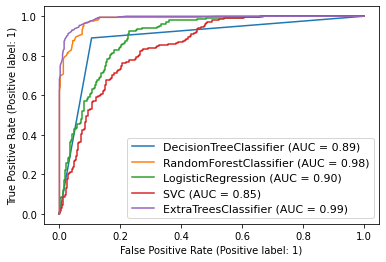

In [40]:

disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(log_reg, x_test, y_test, ax=disp.ax_)

plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)

plot_roc_curve(etc, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size":11}, loc="lower right")

plt.show()

# Hyper Parameter Tuning
### Let us try to tune the proposed model (ExtraTreesClassifier) to get better accuracy, if possible
#### The "paramaters" have been selected from the skicit library and I have considered 4 paramaters

In [41]:

parameters = {"n_estimators":[100,150],
              "criterion":["gini", "entropy"],
              "max_features":["auto", "sqrt", "log2"],
              "min_samples_split": [2,4,6]}


# GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [42]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [43]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150]})

In [44]:
GCV.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 100}

### Rebuild the model using the appropriate params we recieved from best_params_
#### Its observed that the model accuracy was approximately 93.51 % earlier and post Hyper Parameter tuning its now approximately 93.95% better

In [45]:
# rebuild the model

mod = ExtraTreesClassifier(criterion="gini", max_features="log2", min_samples_split= 2, n_estimators=100)

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

93.95532194480947


# Saving the model (using joblib)

In [47]:

import joblib
joblib.dump(mod,"Wine_Dataset.pkl")

['Wine_Dataset.pkl']

# Loading the saved mode

In [48]:
# Load the model

model = joblib.load("Wine_Dataset.pkl")

In [49]:
prediction = model.predict(x_test)

In [51]:
prediction=pd.DataFrame(prediction)